In [1]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\moshe\AppData\Roaming\Python\Python38\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\moshe\AppData\Local\Temp\tmpfwkg55rk
  JVM stdout: C:\Users\moshe\AppData\Local\Temp\tmpfwkg55rk\h2o_moshe_started_from_python.out
  JVM stderr: C:\Users\moshe\AppData\Local\Temp\tmpfwkg55rk\h2o_moshe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Jerusalem
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,"14 days, 5 hours and 4 minutes"
H2O_cluster_name:,H2O_from_python_moshe_rbvuzi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.511 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [2]:
# define data file path
data_path = 'data/dataset_crimes__v2.csv'

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
df.describe()

Rows:34226
Cols:23




,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,C23
type,int,string,time,enum,int,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,time,real,real,enum,enum
mins,12258517.0,NaN,1609459200000.0,,420.0,,,,,,111.0,1.0,1.0,1.0,1.0,1.0,1.0,2021.0,2021.0,41.644607723,-87.934272688,,
mean,12300582.518509863,NaN,1613877513124.9087,,842.9272320607881,,,,,,1167.2786115486347,12.901172280753823,23.68522528401507,52.581972242512784,9.890893006339999,1144968.1873121576,1855887.467269887,5274.926647683455,1587511079764.712,28399.247622667473,-55.72859667074053,,
maxs,12345378.0,NaN,1618711260000.0,,1375.0,,,,,,2535.0,2533.0,2221.0,2535.0,76.0,1205112.0,1951493.0,1941092.0,1621011180000.0,1950055.0,2021.0,,
sigma,23466.246868064467,NaN,2606793602.7029395,,322.5518579714951,,,,,,703.7012220966282,47.066711464274036,30.64081725950123,148.50464532522832,4.248161735623986,151237.13885474743,235388.87165127782,75486.20985893747,207720917232.82587,229224.02201820436,256.8855603282409,,
zeros,0,0,0,,0,,,,,,0,0,0,0,0,0,0,0,0,0,0,,
missing,1,1,1,1,1588,1,1,238,1,1,577,531,513,1,13879,288,297,512,1,333,306,287,287
0,12260346.0,JE102126,2021-01-03 13:23:00,070XX S EGGLESTON AVE,486.0,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,732.0,7.0,6.0,68.0,nan,1174496.0,1858251.0,2021.0,2021-01-16 15:49:23,41.766435144,-87.635963997,(41.766435144,-87.635963997)
1,12263464.0,JE105797,2021-01-03 06:59:00,080XX S YALE AVE,820.0,THEFT,$500 AND UNDER,RESIDENCE,False,False,623.0,6.0,17.0,44.0,6.0,1176011.0,1851718.0,2021.0,2021-01-16 15:49:23,41.748473982,-87.63060658799999,(41.748473982,-87.630606588)
2,12259990.0,JE101773,2021-01-03 12:20:00,056XX W WASHINGTON BLVD,486.0,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1513.0,15.0,29.0,25.0,nan,1138722.0,1900183.0,2021.0,2021-01-16 15:49:23,41.88222427,-87.766076162,(41.88222427,-87.766076162)


In [4]:
df.head()

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,C23
1.22603e+07,JE102126,2021-01-03 13:23:00,070XX S EGGLESTON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,732,7,6,68,nan,1.1745e+06,1.85825e+06,2021,2021-01-16 15:49:23,41.7664,-87.636,(41.766435144,-87.635963997)
1.22635e+07,JE105797,2021-01-03 06:59:00,080XX S YALE AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,False,623,6,17,44,6,1.17601e+06,1.85172e+06,2021,2021-01-16 15:49:23,41.7485,-87.6306,(41.748473982,-87.630606588)
1.226e+07,JE101773,2021-01-03 12:20:00,056XX W WASHINGTON BLVD,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1513,15,29,25,nan,1.13872e+06,1.90018e+06,2021,2021-01-16 15:49:23,41.8822,-87.7661,(41.88222427,-87.766076162)
1.22602e+07,JE101923,2021-01-03 08:54:00,106XX S YATES AVE,560,ASSAULT,SIMPLE,CHA APARTMENT,False,False,434,4,7,51,nan,1.19434e+06,1.835e+06,2021,2021-01-16 15:49:23,41.7022,-87.564,(41.702154047,-87.563980453)
1.22605e+07,JE102382,2021-01-03 16:30:00,013XX W TAYLOR ST,820,THEFT,$500 AND UNDER,APARTMENT,True,True,1231,12,28,28,6,1.16768e+06,1.89571e+06,2021,2021-01-16 15:49:23,41.8694,-87.6599,(41.869367371,-87.659882148)
1.22608e+07,JE102660,2021-01-03 22:30:00,014XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,2433,24,48,77,14,1.16562e+06,1.94164e+06,2021,2021-01-16 15:49:23,41.9955,-87.6661,(41.995462301,-87.666121505)
1.22607e+07,JE102492,2021-01-03 21:25:00,035XX W 26TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,SMALL RETAIL STORE,False,False,1032,10,22,30,14,1.15298e+06,1.8865e+06,2021,2021-01-16 15:49:23,41.8444,-87.7141,(41.844395123,-87.714097492)
1.22601e+07,JE101886,2021-01-03 05:45:00,029XX N DAWSON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,1412,14,35,21,14,1.15348e+06,1.9195e+06,2021,2021-01-16 15:49:23,41.9349,-87.7114,(41.934945926,-87.71137369)
1.22613e+07,JE103188,2021-01-03 03:20:00,111XX S ASHLAND AVE,820,THEFT,$500 AND UNDER,STREET,False,False,2234,22,34,75,6,nan,nan,2021,2021-01-10 15:51:53,nan,nan,,
1.22604e+07,JE102224,2021-01-03 14:30:00,048XX W HARRISON ST,560,ASSAULT,SIMPLE,BARBERSHOP,False,True,1533,15,29,25,nan,1.1443e+06,1.8969e+06,2021,2021-01-16 15:49:23,41.8731,-87.7457,(41.873115002,-87.745664971)


In [5]:
y = "Primary Type"

In [6]:
cols = {
    'ID': 'drop',
    'Case Number': 'drop',
    'Date': 'drop',
    'Block': 'cat',
    'IUCR': 'drop',
    'Primary Type': 'cat',
    'Description': 'drop',
    'Location Description': 'cat',
    'Arrest': 'cat',
    'Domestic': 'cat',
    'Beat': 'cat',
    'District': 'cat',
    'Ward': 'cat',
    'Community Area': 'cat',
    'FBI Code': 'drop',
    'X Coordinate': 'drop',
    'Y Coordinate': 'drop',
    'Year': 'num',
    'Updated On': 'drop',
    'Latitude': 'num',
    'Longitude': 'num',
    'Location': 'drop',
    'C23': 'drop'
}

In [7]:
x = df.columns
x.remove(y)

for col_name, op in cols.items():
    if op == 'drop' and col_name in x:
        x.remove(col_name)
    elif op == 'cat':
        df[col_name] = df[col_name].asfactor()

In [8]:
splits = df.split_frame(ratios=[0.8], seed=1)
train = splits[0]
test = splits[1]

In [9]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
23:04:55.50: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [10]:
lb = aml.leaderboard

In [11]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
StackedEnsemble_BestOfFamily_AutoML_20210602_230455,0.52325,1.19945,0.658922,0.434178,nan,nan
StackedEnsemble_AllModels_AutoML_20210602_230455,0.524267,1.19812,0.658446,0.433551,nan,nan
GBM_grid__1_AutoML_20210602_230455_model_1,0.524676,1.22906,0.663745,0.440558,nan,nan
DeepLearning_1_AutoML_20210602_230455,0.530482,1.2273,0.657626,0.432472,nan,nan
GBM_2_AutoML_20210602_230455,0.530663,1.24561,0.663882,0.440739,nan,nan
GBM_1_AutoML_20210602_230455,0.53106,1.24589,0.664582,0.441669,nan,nan
GBM_3_AutoML_20210602_230455,0.535265,1.2745,0.663861,0.440712,nan,nan
GBM_5_AutoML_20210602_230455,0.53626,1.26752,0.663007,0.439578,nan,nan
GBM_4_AutoML_20210602_230455,0.53797,1.28055,0.664538,0.44161,nan,nan
DRF_1_AutoML_20210602_230455,0.545788,1.47611,0.661914,0.438129,nan,nan


In [12]:
model = aml.leader

In [13]:
pred_vec = model.predict(test).as_data_frame()['predict']
pred_vec

stackedensemble prediction progress: |████████████████████████████████████| 100%


0               BATTERY
1               BATTERY
2               BATTERY
3       CRIMINAL DAMAGE
4               BATTERY
             ...       
6743            BATTERY
6744            BATTERY
6745            BATTERY
6746    CRIMINAL DAMAGE
6747            BATTERY
Name: predict, Length: 6748, dtype: object

In [14]:
gt_vs_pred = pd.DataFrame({'gt': test.as_data_frame()[y].values, 'pred': pred_vec.values})

In [15]:
(gt_vs_pred['gt'] == gt_vs_pred['pred']).mean()

0.5208950800237108

In [43]:
labels = gt_vs_pred['gt'].unique().tolist()
num_labels = len(labels)

summ_arr = np.zeros([num_labels, num_labels])
for gt_idx in range(num_labels):
    gt_label = labels[gt_idx]
    gt_df = gt_vs_pred[gt_vs_pred['gt'] == gt_label]
    num_gt = gt_df.shape[0]
    for pred_idx in range(num_labels):
        pred_label = labels[pred_idx]
        num_equal = (gt_df['pred'] == pred_label).sum()
        summ_arr[gt_idx, pred_idx] = num_equal / num_gt

summ_arr

array([[0.74577167, 0.01057082, 0.13107822, 0.06183932, 0.05073996],
       [0.44432432, 0.02486486, 0.28756757, 0.14162162, 0.10162162],
       [0.13400236, 0.00649351, 0.5785124 , 0.18713105, 0.09386068],
       [0.03641457, 0.00373483, 0.10644258, 0.82072829, 0.03267974],
       [0.25471698, 0.01286449, 0.33276158, 0.20926244, 0.19039451]])

In [45]:
conf_mat_df = pd.DataFrame(summ_arr, index=labels, columns=labels)
conf_mat_df

,BATTERY,ASSAULT,THEFT,DECEPTIVE PRACTICE,CRIMINAL DAMAGE
BATTERY,0.745772,0.010571,0.131078,0.061839,0.050740
ASSAULT,0.444324,0.024865,0.287568,0.141622,0.101622
THEFT,0.134002,0.006494,0.578512,0.187131,0.093861
DECEPTIVE PRACTICE,0.036415,0.003735,0.106443,0.820728,0.032680
CRIMINAL DAMAGE,0.254717,0.012864,0.332762,0.209262,0.190395


In [46]:
import seaborn as sn

Text(114.0, 0.5, 'Ground Truth')

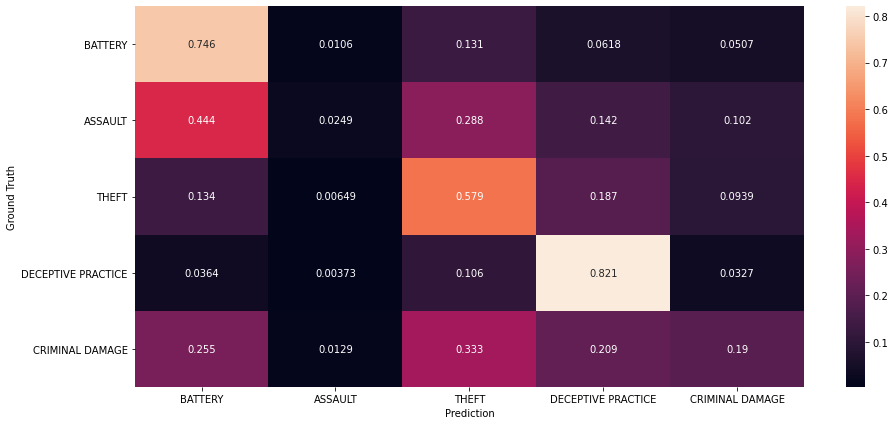

In [52]:
plt.figure(figsize = (15,7))
sn.heatmap(conf_mat_df, annot=True, fmt='.3g')
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")